<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/Challenge_Week_2%2C_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# Data Cleaning

*Make a copy of this notebook to edit!*
```
File > Save a copy in Drive
```

We will use data on the Super Bowls. You can download the data [here](https://drive.google.com/file/d/1kWqIFO9LgVlMsYG9M9boRKCFiizpUB5o/view?usp=sharing).

</center>

**Why do we need to clean our data?**

> Garbage in, garbage out.

> Quality data beats fancy algorithms.

Overall, incorrect data is either removed, corrected, or imputed. ([*source*](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4))



Mount Data 
- Use the file URL below instead of mounting google drive. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAwjsA-rwGlz_Bb0yIgC13scmhxQCjayvh-sp0v3lRMxejeem8ntBBcDpr4xbNNMiGzB8VGPKJzGJv/pub?output=csv"

**Import Libraries**

In [3]:
# Imports
import pandas as pd
import numpy as np

**Load Data & view first 5 rows**

In [4]:
# Load Data
df = pd.read_csv(file_url)
df.head()

,Unnamed: 0,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,...,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,...,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,...,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,...,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,...,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


## Irrelevant data

Irrelevant data is information that is unnecessary or unrelated to our task.

Typically, we want to remove this data - but **only if you are absolutely sure it is irrelevant**. When in doubt, consult a subject matter expert.

**What column seems unnecessary in this dataset? Drop it.**

In [5]:
# List the columns
df.columns
del_cols = ['Unnamed: 0', 
            'SB', 
            'Referee',
            'Umpire',
            'Head Linesman',
            'Line Judge',
            'Field Judge',
            'Back Judge',
            'Side Judge']
df.drop(columns = del_cols, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              53 non-null     object
 1   Attendance        53 non-null     int64 
 2   QB  Winner        53 non-null     object
 3   Coach Winner      53 non-null     object
 4   Winner            53 non-null     object
 5   Winning Pts       53 non-null     int64 
 6   QB Loser          53 non-null     object
 7   Coach Loser       53 non-null     object
 8   Loser             53 non-null     object
 9   Losing Pts        53 non-null     int64 
 10  MVP               53 non-null     object
 11  Stadium           53 non-null     object
 12  City              53 non-null     object
 13  State             53 non-null     object
 14  Point Difference  53 non-null     int64 
dtypes: int64(4), object(11)
memory usage: 6.3+ KB


## Duplicate data

It is common that your data has data points that are repeated. Duplicates should be removed.

**Check for and remove any duplicates in this data.**

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated(keep = False)]

,Date,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference
20,25-Jan-87,101063,Phil Simms,Bill Parcells,New York Giants,39,John Elway,Dan Reeves,Denver Broncos,20,Phil Simms,Rose Bowl,Pasadena,California,19
52,25-Jan-87,101063,Phil Simms,Bill Parcells,New York Giants,39,John Elway,Dan Reeves,Denver Broncos,20,Phil Simms,Rose Bowl,Pasadena,California,19


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

## Data types

You want your data to all be correct data types. There may be errors in your data causing numeric types to be read in as objects or dates that need to be converted to datetime objects. Additionally, we may want to convert our categorical variables to numbers.

**Check the datatypes & validate that they are what they should be. The `Date` column should be a DateTime type - fix this using `df['Date'] = pd.to_datetime(df['Date'])` if is not the case!**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              52 non-null     object
 1   Attendance        52 non-null     int64 
 2   QB  Winner        52 non-null     object
 3   Coach Winner      52 non-null     object
 4   Winner            52 non-null     object
 5   Winning Pts       52 non-null     int64 
 6   QB Loser          52 non-null     object
 7   Coach Loser       52 non-null     object
 8   Loser             52 non-null     object
 9   Losing Pts        52 non-null     int64 
 10  MVP               52 non-null     object
 11  Stadium           52 non-null     object
 12  City              52 non-null     object
 13  State             52 non-null     object
 14  Point Difference  52 non-null     int64 
dtypes: int64(4), object(11)
memory usage: 6.5+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
date_filter = df['Date'] >= np.datetime64('2020-01-01')
df.loc[date_filter, 'Date']

# This is not the most elegant solution to this problem
# I would like to find a better way to handle this as I 
# think this is probably a fairly common problem in data science.
for i in df['Date'].index:
  if df.loc[i, 'Date'] > np.datetime64('2020-01-01'):
    df.loc[i, 'Date'] = np.datetime64('19' + str(df.loc[i, 'Date'])[2:])
df['Date']

0    1967-01-15
1    1968-01-14
2    1969-01-12
3    1970-01-11
4    1971-01-17
5    1972-01-16
6    1973-01-14
7    1974-01-13
8    1975-01-12
9    1976-01-18
10   1977-01-09
11   1978-01-15
12   1979-01-21
13   1980-01-20
14   1981-01-25
15   1982-01-24
16   1983-01-30
17   1984-01-22
18   1985-01-20
19   1986-01-26
20   1987-01-25
21   1988-01-31
22   1989-01-22
23   1990-01-28
24   1991-01-27
25   1992-01-26
26   1993-01-31
27   1994-01-30
28   1995-01-29
29   1996-01-28
30   1997-01-26
31   1998-01-25
32   1999-01-31
33   2000-01-30
34   2001-01-28
35   2002-02-03
36   2003-01-26
37   2004-02-01
38   2005-02-06
39   2006-02-05
40   2007-02-04
41   2008-02-03
42   2009-02-01
43   2010-02-07
44   2011-02-06
45   2012-02-05
46   2013-02-03
47   2014-02-02
48   2015-02-01
49   2016-02-07
50   2017-02-05
51   2018-02-04
Name: Date, dtype: datetime64[ns]

Pandas is usually pretty good at converting date times.  However, when the year is 2 digits it can be ambiguous and Pandas may choose the wrong century.   

Check if this happened and if so, fix it.  Don't forget the `df.loc()` method.

You may have to convert it to a datetime again.

Hint: `df.loc[0, 'Date'] = '1967-01-15'`

## Syntax or spelling errors

Common syntax errors include extra white spaces at the beginning or end of strings or column names.

There may also be typos or inconsistencies in strings that need to be fixed. For example, if a state name is spelled out in one row and the abbreviation is used in another, we need to ensure consistency.

**Check for any inconsistencies in the strings of the `State` column and fix them.**

Don't forget the `df.replace()` method

In [12]:
# Here is a way in which you can store your string columns in a variable to use later in a for loop
# This code filters out the object type columns and creates a list of each of the column names as an index
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['QB  Winner', 'Coach Winner', 'Winner', 'QB Loser', 'Coach Loser',
       'Loser', 'MVP', 'Stadium', 'City', 'State'],
      dtype='object')

In [18]:
# This for loop prints out each column name and then lists each category
# in the column along with the counts of each category
# I added sort_index to make it easier to find the inconsistencies.
for col in str_cols:
  print(f'- {col}:')
  print(df[col].value_counts(dropna=False).sort_index())
  print('\n\n')

- QB  Winner:
Aaron Rodgers                   1
Bart Starr                      2
Ben Roethlisberger              2
Bob Griese                      2
Brad Johnson                    1
Brett Favre                     1
Doug Williams                   1
Drew Brees                      1
Earl Morrall , Johnny Unitas    1
Eli Manning                     2
Jeff Hostetler                  1
Jim McMahon                     1
Jim Plunkett                    2
Joe Flacco                      1
Joe Montana                     3
Joe Montano                     1
Joe Namath                      1
Joe Theismann                   1
John Elway                      2
Kenny Stabler                   1
Kurt Warner                     1
Len Dawson, Mike Livingston     1
Mark Rypien                     1
Nick Foles                      1
Peyton Manning                  2
Phil Simms                      1
Roger Staubach                  2
Russell Wilson                  1
Steve Young                     1


In [35]:
# Fix inconsistencies in the QB Winner column
df.replace('Joe Montano', 'Joe Montana', inplace = True)
df.replace('Earl Morrall , Johnny Unitas', 'Earl Morrall, Johnny Unitas', inplace = True)
# We discovered an extra space in the column name 'QB Winner'
df.rename(columns = {'QB  Winner': 'QB Winner'}, inplace = True)
df['QB Winner'].value_counts()

Tom Brady                      5
Joe Montana                    4
Terry Bradshaw                 4
Troy Aikman                    3
Eli Manning                    2
Peyton Manning                 2
Ben Roethlisberger             2
John Elway                     2
Bart Starr                     2
Jim Plunkett                   2
Roger Staubach                 2
Bob Griese                     2
Trent Dilfer                   1
Russell Wilson                 1
Joe Flacco                     1
Aaron Rodgers                  1
Drew Brees                     1
Len Dawson, Mike Livingston    1
Earl Morrall, Johnny Unitas    1
Brad Johnson                   1
Kurt Warner                    1
Joe Theismann                  1
Kenny Stabler                  1
Brett Favre                    1
Steve Young                    1
Joe Namath                     1
Mark Rypien                    1
Jeff Hostetler                 1
Doug Williams                  1
Phil Simms                     1
Jim McMaho

In [43]:
# Remove the underscore in the 'Coach Winner' and 'Coach Loser' columns.
df['Coach Winner'] = df['Coach Winner'].str.replace('_', '')
df['Coach Winner'].value_counts()

df['Coach Loser'] = df['Coach Loser'].str.replace('_', '')
df['Coach Loser'].value_counts()

Dan Reeves        4
Don Shula         4
Bud Grant         4
Marv Levy         4
Tom Landry        3
Bill Belichick    3
Mike Holmgren     2
John Fox          2
Hank Stram        1
Bill Callahan     1
Andy Reid         1
Lovie Smith       1
Ken Whisenhunt    1
Jim Fassel        1
Jim Caldwell      1
Mike Tomlin       1
Jim Harbaugh      1
Pete Carroll      1
Ron Rivera        1
Mike Martz        1
Bill Parcells     1
Jeff Fisher       1
John Rauch        1
Bill Cowher       1
Bobby Ross        1
Sam Wyche         1
Raymond Berry     1
Joe Gibbs         1
Forrest Gregg     1
Dick Vermeil      1
Ray Malavasi      1
Red Miller        1
George Allen      1
Dan Quinn         1
Name: Coach Loser, dtype: int64

## Missing values

Missing values are very common and problematic in our data. There is no one right way to handle missing data. A few strategies include:
- Drop
- Impute

### Dropping missing values

If there are not very many missing values and they are missing completely at random, the fastest and easiest solution is to drop the rows with missing values.

Similarly, if most of a column is missing data and the data is missing completely at random, it may be okay to drop the entire column

### Imputing missing values

Imputing means filling in the missing values based on some criterion. There are many methods to do this:
- Simple imputation including mean, median, or mode, or a specific constant value.

### Make sure to explain why you chose the method you did in a text cell.

**Check for missing data. Determine the best way to deal with this.**

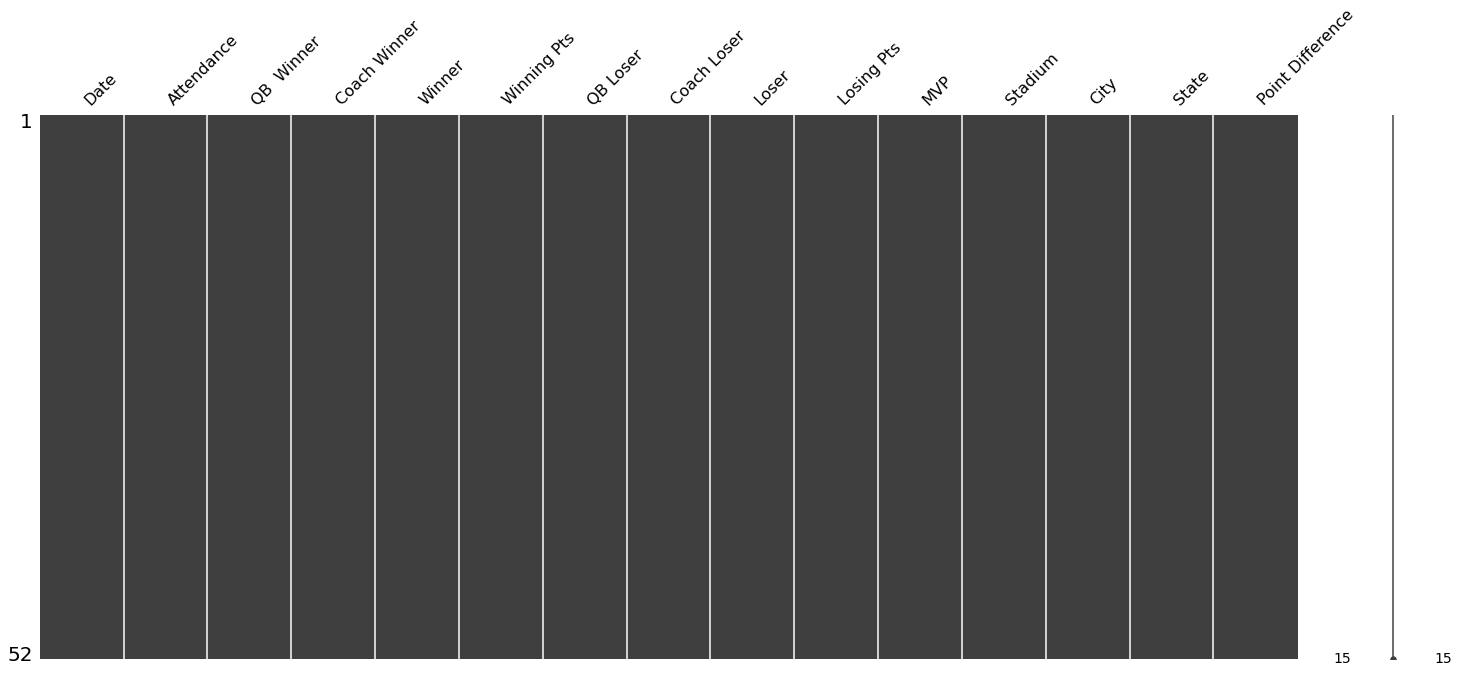

In [15]:
import missingno
# This output shows you were the missing data is in the dataframe.
# This white space represents data that is missing
missingno.matrix(df)

To drop a subset of your data, you may want to use `df2 = df.dropna(subset=['column names'], how = 'all')` to drop a subset of your data.

## Outliers

Outliers are values that are extremely higher or lower than all of the other values in that feature. In general, outliers should not be removed unless you have reason to believe it is an error in the dataset. It is important to investigate outliers, as some models are very sensitive to outliers.

**Check for outliers in the numeric columns using df.describe().**


# Exploratory Data Analysis - Questions to Answer

- For each question, display on the columns required to answer the question.

### Q1. Which 3 Superbowl #'s/years had the largest attendance?


- A1: 


### Q2. Which Stadiums hosted the Superbowl with the largest attendance?

- A2: 

### Q3: What city has hosted the most number of superbowls? How many?

- A3:

### Q4: Of all of the superbowls hosted in the city from Q3, which SB # had the lowest attendance?

- A4: 

### Q5: What is the average point difference between teams, for each City? Which city has the highest average Point Difference?

- A5: